<a href="https://colab.research.google.com/github/PratikChakrabortyaz/Neural-Networks/blob/main/RNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing of modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

Hyperparameters initialization

In [ ]:
input_size=2
hidden_size=10
output_size=1

Weights and Biases initialization

In [ ]:
W_hx=np.random.randn(hidden_size,input_size)*0.01
W_hh=np.random.randn(hidden_size,hidden_size)*0.01
W_yh=np.random.randn(output_size,hidden_size)*0.01
b_h=np.zeros((hidden_size,1))
b_y=np.zeros((output_size,1))

Forward Propagation

In [ ]:
def rnn_next_step(x,h_prev,W_hx,W_hh,b_hh):
  h_next=np.tanh(np.dot(W_hx,x)+np.dot(W_hh,h_prev)+b_h)
  return h_next
def rnn_forward(X,h0,W_hx,W_hh,b_h):
  H=[]
  h=h0
  for t in range(X.shape[0]):
    x_t=X[t].reshape(-1,1)
    h=rnn_next_step(x_t,h,W_hx,W_hh,b_h)
    H.append(h)
  return np.array(H)


Output Layer

In [ ]:
def output_layer(H,W_hy,b_y):
  Y=[]
  for h in H:
    y=np.dot(W_yh,h)+b_y
    Y.append(y)
  return np.array(Y)

BPTT(Backpropagation through time)

In [ ]:
def rnn_bptt(X,Y_true,H,Y_pred,W_hx,W_hh,W_yh):
  dW_hx=np.zeros_like(W_hx)
  dW_hh=np.zeros_like(W_hh)
  dW_yh=np.zeros_like(W_yh)
  db_h=np.zeros_like(b_h)
  db_y=np.zeros_like(b_y)
  dh_next=np.zeros_like(H[0])
  for t in reversed(range(X.shape[0])):
    dy=Y_pred[t]-Y_true[t].reshape(-1,1)
    dW_yh+=np.dot(dy,H[t].T)
    db_y+=dy
    dh=np.dot(W_yh.T,dy)+dh_next
    dh_raw=(1-H[t]**2)*dh
    db_h+=dh_raw
    dW_hx+=np.dot(dh_raw,X[t].reshape(-1,1).T)
    dW_hh+=np.dot(dh_raw,H[t-1].T) if t>0 else np.zeros_like(dW_hh)
    db_h+=dh_raw
    dh_next=np.dot(W_hh.T,dh_raw)
  return dW_hx,dW_hh,dW_yh,db_h,db_y


Dummy data

In [ ]:
sequence_length = 5
X_dummy = np.random.randn(sequence_length, input_size)
h0 = np.zeros((hidden_size, 1))
Y_true_dummy = np.random.randn(sequence_length, output_size)

Training

In [ ]:
epochs=100
alpha=0.01
losses=[]
for epoch in range(epochs):
  H=rnn_forward(X_dummy,h0,W_hx,W_hh,b_h)
  Y_pred=output_layer(H,W_yh,b_y)
  loss=np.mean((Y_pred-Y_true_dummy)**2)
  losses.append(loss)
  dW_hx,dW_hh,dW_yh,db_h,db_y=rnn_bptt(X_dummy,Y_true_dummy,H,Y_pred,W_hx,W_hh,W_yh)
  W_hx-=alpha*dW_hx
  W_hh-=alpha*dW_hh
  W_yh-=alpha*dW_yh
  b_h-=alpha*db_h
  b_y-=alpha*db_y
  if epoch%10==0:
    print(f"Epoch {epoch}, Loss: {loss}")
print("Training Complete")

Epoch 0, Loss: 0.8891692189101172
Epoch 10, Loss: 0.8856366168997247
Epoch 20, Loss: 0.8843745781981476
Epoch 30, Loss: 0.8839253953272249
Epoch 40, Loss: 0.8837693821240217
Epoch 50, Loss: 0.8837243530562325
Epoch 60, Loss: 0.8837343430925153
Epoch 70, Loss: 0.8838015079373376
Epoch 80, Loss: 0.8839782342221275
Epoch 90, Loss: 0.8843980109221462
Training Complete


Plotting the Loss vs Epoch

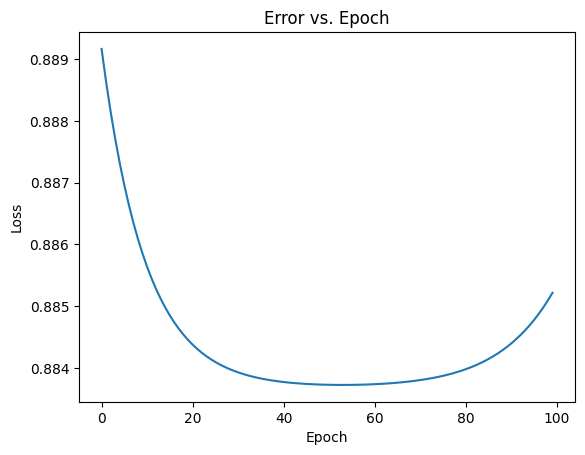

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Error vs. Epoch')
plt.show()